In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
import scipy
import arviz as az
import pymc3 as pm
from tqdm import tqdm
import theano
import theano.tensor as tt
from theano.ifelse import ifelse
import pandas as pd
import datetime
import dtw

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from utils import DataReader
from smooth import average
from align import dtw_align

In [3]:
theano.config.floatX= 'float64'
az.style.use("arviz-darkgrid")

In [4]:
start_date = datetime.date(2020, 9, 10)
forecast_fixed_start_date = datetime.date(2021, 5, 25)
forecast_start_date = datetime.date(2021, 6, 10)
end_date = datetime.date(2021, 6, 30)

In [5]:
smooth_scale = 3
smooth_iteration = 10

In [6]:
de_covid19_csv = "dataset/DE_COVID19.csv"
de_covid19_df = pd.read_csv(de_covid19_csv)
de_policy_csv = "dataset/DE_Policy.csv"
de_policy_df = pd.read_csv(de_policy_csv)
germany_dr = DataReader("DE", de_covid19_df, de_policy_df)
germany_dr.start_date = start_date
germany_dr.end_date = end_date

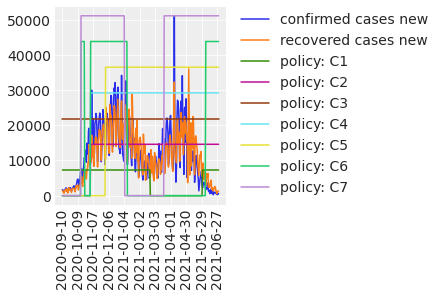

In [7]:
germany_it = np.array(germany_dr.confirmed_cases_new)
germany_it = np.maximum(germany_it, 1)
germany_rt = np.log(germany_it[1:]/germany_it[:-1])
germany_rtavg = average(germany_rt, scale=smooth_scale, iteration=smooth_iteration)
germany_dr.plot()

In [8]:
it_covid19_csv = "dataset/IT_COVID19.csv"
it_covid19_df = pd.read_csv(it_covid19_csv)
it_policy_csv = "dataset/IT_Policy.csv"
it_policy_df = pd.read_csv(it_policy_csv)
italy_dr = DataReader("IT", it_covid19_df, it_policy_df)
italy_dr.start_date = start_date
italy_dr.end_date = end_date

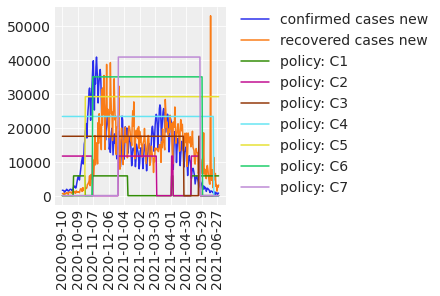

In [9]:
italy_it = np.array(italy_dr.confirmed_cases_new)
italy_it = np.maximum(italy_it, 1)
italy_rt = np.log(italy_it[1:]/italy_it[:-1])
italy_rtavg = average(italy_rt, scale=smooth_scale, iteration=smooth_iteration)
italy_dr.plot()

In [10]:
at_covid19_csv = "dataset/AT_COVID19.csv"
at_covid19_df = pd.read_csv(at_covid19_csv)
at_policy_csv = "dataset/AT_Policy.csv"
at_policy_df = pd.read_csv(at_policy_csv)
austria_dr = DataReader("AT", at_covid19_df, at_policy_df)
austria_dr.start_date = start_date
austria_dr.end_date = end_date

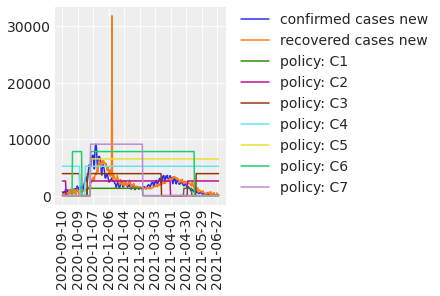

In [11]:
austria_it = np.array(austria_dr.confirmed_cases_new)
austria_it = np.maximum(austria_it, 1)
austria_rt = np.log(austria_it[1:]/austria_it[:-1])
austria_rtavg = average(austria_rt, scale=smooth_scale, iteration=smooth_iteration)
austria_dr.plot()

In [12]:
pl_covid19_csv = "dataset/PL_COVID19.csv"
pl_covid19_df = pd.read_csv(pl_covid19_csv)
pl_policy_csv = "dataset/PL_Policy.csv"
pl_policy_df = pd.read_csv(pl_policy_csv)
poland_dr = DataReader("PL", pl_covid19_df, pl_policy_df)
poland_dr.start_date = start_date
poland_dr.end_date = end_date

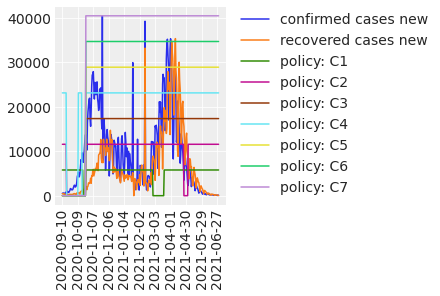

In [13]:
poland_it = np.array(poland_dr.confirmed_cases_new)
poland_it = np.maximum(poland_it, 1)
poland_rt = np.log(poland_it[1:]/poland_it[:-1])
poland_rtavg = average(poland_rt, scale=smooth_scale, iteration=smooth_iteration)
poland_dr.plot()

In [14]:
be_covid19_csv = "dataset/BE_COVID19.csv"
be_covid19_df = pd.read_csv(be_covid19_csv)
be_policy_csv = "dataset/BE_Policy.csv"
be_policy_df = pd.read_csv(be_policy_csv)
belgium_dr = DataReader("BE", be_covid19_df, be_policy_df)
belgium_dr.start_date = start_date
belgium_dr.end_date = end_date

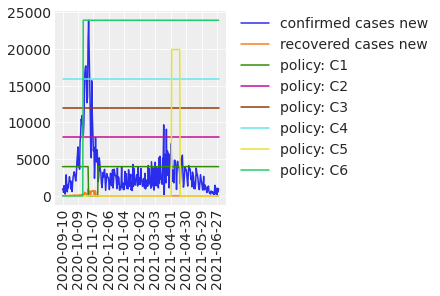

In [15]:
belgium_it = np.array(belgium_dr.confirmed_cases_new)
belgium_it = np.maximum(belgium_it, 1)
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = [belgium_it[i] if belgium_it[i]!=1 else belgium_it[i-1] for i in range(len(belgium_it))]
belgium_it = np.array(belgium_it)
belgium_rt = np.log(belgium_it[1:]/belgium_it[:-1])
belgium_rtavg = average(belgium_rt, scale=smooth_scale, iteration=smooth_iteration)
belgium_dr.plot()

In [16]:
hr_covid19_csv = "dataset/HR_COVID19.csv"
hr_covid19_df = pd.read_csv(hr_covid19_csv)
hr_policy_csv = "dataset/HR_Policy.csv"
hr_policy_df = pd.read_csv(hr_policy_csv)
croatia_dr = DataReader("HR", hr_covid19_df, hr_policy_df)
croatia_dr.start_date = start_date
croatia_dr.end_date = end_date

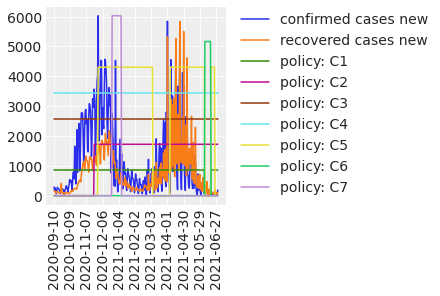

In [17]:
croatia_it = np.array(croatia_dr.confirmed_cases_new)
croatia_it = np.maximum(croatia_it, 1)
for i in range(3):
    croatia_it = [croatia_it[i] if croatia_it[i]!=1 else croatia_it[i-1] for i in range(len(croatia_it))]
    pass
croatia_it = np.array(croatia_it)
croatia_rt = np.log(croatia_it[1:]/croatia_it[:-1])
croatia_rtavg = average(croatia_rt, scale=smooth_scale, iteration=smooth_iteration)
croatia_dr.plot()

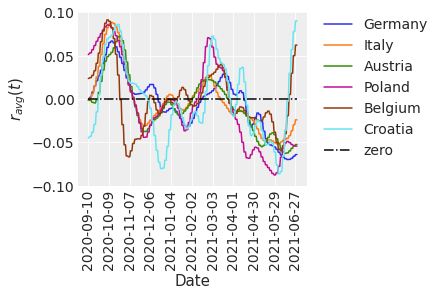

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.plot(germany_rtavg, label=r"Germany")
ax.plot(italy_rtavg, label=r"Italy")
ax.plot(austria_rtavg, label=r"Austria")
ax.plot(poland_rtavg, label=r"Poland")
ax.plot(belgium_rtavg, label=r"Belgium")
ax.plot(croatia_rtavg, label=r"Croatia")
ax.plot(np.zeros(len(germany_rtavg)), "-.", color="black", label="zero")
dates = germany_dr.dates
plt.legend(bbox_to_anchor=(1.05, 1.0), borderaxespad=0)
x_day_interval = max(1, (len(dates)-1) // 10)
plt.xticks(list(range(0, len(dates), x_day_interval)), dates[0::x_day_interval], rotation="vertical")
plt.ylim(-0.1, 0.1)
plt.xlabel("Date")
plt.ylabel(r"$r_{avg}(t)$")
plt.show()

In [19]:
it_obs = np.array([germany_it, italy_it, austria_it, \
                   poland_it, belgium_it, croatia_it])
it_obs_log = np.log(it_obs)

In [20]:
policy_series = np.array([np.array(germany_dr.policy_series)[:, :-1], \
                          np.array(italy_dr.policy_series)[:, :-1], \
                          np.array(austria_dr.policy_series)[:, :-1], \
                          np.array(poland_dr.policy_series)[:, :-1], \
                          np.array(belgium_dr.policy_series)[:, :-1], \
                          np.array(croatia_dr.policy_series)[:, :-1], \
                         ])
policy_series = policy_series.transpose(1, 0, 2)

In [21]:
def S(x):
    
    Sx = tt.zeros_like(x[0])
    
    def next_step(x, Sx):
        Sx = Sx + x
        return Sx
    
    sequences = [x]
    outputs_info = [Sx]
    
    outputs, _ = theano.scan(fn=next_step, sequences=sequences, outputs_info=outputs_info)
    
    return outputs

In [22]:
def Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed):
    
    r = tt.zeros_like(R0)
    rs = tt.zeros_like(R0)
    policy_series = tt.as_tensor_variable(policy_series)
    Rt_prev = R0 * tt.exp(-tt.sum(policy_series[0] * policy_weights, axis=-1))
    
    def next_day(R_trend, policy_series, r, rs, Rt_prev, policy_weights, gamma, R0, Rt_speed):
        R_star = (R0 +  R_trend) * tt.exp(-tt.sum(policy_series * policy_weights, axis=-1))
        Rt = Rt_prev + Rt_speed * (R_star - Rt_prev)
        Rt_prev = Rt
        r = gamma * (Rt - 1.0)
        rs = rs + r
        return r, rs, Rt_prev
    
    sequences = [R_trend, policy_series[1:]]
    outputs_info = [r, rs, Rt_prev]
    non_sequences = [policy_weights, gamma, R0, Rt_speed]
    
    outputs, _ = theano.scan(fn=next_day, sequences=sequences, outputs_info=outputs_info, \
                             non_sequences=non_sequences)
    
    return outputs

In [23]:
with pm.Model() as model1:
    
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0)
    
    fixed_days = (datetime.date(2020, 12, 1) - start_date).days - 1
    forecast_fixed_days = (end_date - forecast_fixed_start_date).days + 1
    forecast_days = (end_date - forecast_start_date).days + 1
    
    d_trend_res = pm.Normal(r"$\delta_{trend,common}$", 0.0, 0.01, \
                            shape=(len(dates)-1-fixed_days-forecast_fixed_days))
    s_trend_res = pm.Deterministic(r'$\Sigma_{trend,common}$', S(d_trend_res))
    s_trend_fixed = tt.constant(np.zeros((fixed_days), dtype=np.float64))
    s_trend = tt.concatenate([s_trend_fixed, s_trend_res], axis=0)
    
    sigma_trend = 0.40
    
    indices = dtw_align(poland_rtavg, germany_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    germany_trend_fit = pm.Normal(r"$\Sigma_{trend,germany}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    germany_trend_forecast = tt.repeat(germany_trend_fit[-1:], forecast_fixed_days, axis=0)
    germany_trend = tt.concatenate([germany_trend_fit, germany_trend_forecast], axis=0)
    germany_trend = germany_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, italy_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    italy_trend_fit = pm.Normal(r"$\Sigma_{trend,italy}$", s_trend[indices], sigma_trend, \
                                shape=(len(dates)-1-forecast_fixed_days))
    italy_trend_forecast = tt.repeat(italy_trend_fit[-1:], forecast_fixed_days, axis=0)
    italy_trend = tt.concatenate([italy_trend_fit, italy_trend_forecast], axis=0)
    italy_trend = italy_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, austria_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    austria_trend_fit = pm.Normal(r"$\Sigma_{trend,austria}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    austria_trend_forecast = tt.repeat(austria_trend_fit[-1:], forecast_fixed_days, axis=0)
    austria_trend = tt.concatenate([austria_trend_fit, austria_trend_forecast], axis=0)
    austria_trend = austria_trend.dimshuffle(0, "x")
    
    poland_trend_fit = pm.Normal(r"$\Sigma_{trend,poland}$", s_trend, sigma_trend, \
                             shape=(len(dates)-1-forecast_fixed_days))
    poland_trend_forecast = tt.repeat(poland_trend_fit[-1:], forecast_fixed_days, axis=0)
    poland_trend = tt.concatenate([poland_trend_fit, poland_trend_forecast], axis=0)
    poland_trend = poland_trend.dimshuffle(0, "x")
    
    
    indices = dtw_align(poland_rtavg, belgium_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    belgium_trend_fit = pm.Normal(r"$\Sigma_{trend,belgium}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    belgium_trend_forecast = tt.repeat(belgium_trend_fit[-1:], forecast_fixed_days, axis=0)
    belgium_trend = tt.concatenate([belgium_trend_fit, belgium_trend_forecast], axis=0)
    belgium_trend = belgium_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, croatia_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    croatia_trend_fit = pm.Normal(r"$\Sigma_{trend,croatia}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    croatia_trend_forecast = tt.repeat(croatia_trend_fit[-1:], forecast_fixed_days, axis=0)
    croatia_trend = tt.concatenate([croatia_trend_fit, croatia_trend_forecast], axis=0)
    croatia_trend = croatia_trend.dimshuffle(0, "x")
    
    R_trend = tt.concatenate([germany_trend, italy_trend, austria_trend, \
                              poland_trend, belgium_trend, croatia_trend], axis=1)
    
    ScaleLimitedNormal = pm.Bound(pm.Normal, lower=0.0, upper=1.0)
    Rt_speed = ScaleLimitedNormal(r"$k_{p}$", mu=0.30, sigma=0.05)
    
    LimitedLaplace = pm.Bound(pm.Laplace, lower=0.0, upper=0.30)
    policy_weights_commom = LimitedLaplace(r"$\alpha_{policy}$", 0.10, 0.05, shape=(policy_series.shape[-1]))
    
    germany_policy_weights = pm.Normal(r"$\alpha_{policy,germany}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    germany_policy_weights = germany_policy_weights.dimshuffle("x", 0)
    italy_policy_weights = pm.Normal(r"$\alpha_{policy,italy}$", policy_weights_commom, 0.025, \
                                     shape=(policy_series.shape[-1]))
    italy_policy_weights = italy_policy_weights.dimshuffle("x", 0)
    austria_policy_weights = pm.Normal(r"$\alpha_{policy,austria}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    austria_policy_weights = austria_policy_weights.dimshuffle("x", 0)
    poland_policy_weights = pm.Normal(r"$\alpha_{policy,poland}$", policy_weights_commom, 0.025, \
                                      shape=(policy_series.shape[-1]))
    poland_policy_weights = poland_policy_weights.dimshuffle("x", 0)
    
    belgium_policy_weights = pm.Normal(r"$\alpha_{policy,belgium}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    belgium_policy_weights = belgium_policy_weights.dimshuffle("x", 0)
    
    croatia_policy_weights = pm.Normal(r"$\alpha_{policy,croatia}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    croatia_policy_weights = croatia_policy_weights.dimshuffle("x", 0)
    
    
    policy_weights = tt.concatenate([germany_policy_weights, italy_policy_weights, \
                                     austria_policy_weights, poland_policy_weights, \
                                     belgium_policy_weights, croatia_policy_weights], axis=0)
    
    gamma = PositiveNormal(r"$\gamma$", mu=0.1, sigma=0.01)
    
    R0 = pm.Normal(r"$R_{0}$", 1.90, 0.05, shape=(it_obs.shape[0]))
    
    r, rs, Rt_prev = Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed)

    log_it0 = np.mean(it_obs_log[:, 0:5], axis=-1)
    
    log_it = log_it0 + rs
    germany_log_it = pm.Deterministic(r'$i_{germany}(t)$', log_it[:, 0])
    italy_log_it = pm.Deterministic(r'$i_{italy}(t)$', log_it[:, 1])
    austria_log_it = pm.Deterministic(r'$i_{austria}(t)$', log_it[:, 2])
    poland_log_it = pm.Deterministic(r'$i_{poland}(t)$', log_it[:, 3])
    belgium_log_it = pm.Deterministic(r'$i_{belgium}(t)$', log_it[:, 4])
    croatia_log_it = pm.Deterministic(r'$i_{croatia}(t)$', log_it[:, 5])

    
    eps = pm.HalfCauchy(r'$\varepsilon_{i(t)}$', beta=0.1)
    
    obs_fit = pm.Normal(r'Fit', mu=log_it[:-forecast_days], sigma=eps, \
                        shape=(len(dates)-1-forecast_days, it_obs.shape[0]), \
                        observed=it_obs_log[:, 1:-forecast_days].transpose(1, 0))
    

    # advi+nuts
    trace1 = pm.sample(4000, cores=4, chains=1, tune=6000, init='advi', \
                      return_inferencedata=True)
    '''
    
    # metropolis
    step1 = pm.Metropolis(vars=[d_trend_res, policy_weights_commom, log_it])
    step2 = pm.Slice(vars=[eps])
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, step=[step1, step2], init='advi', \
                      return_inferencedata=True)
                      
    '''
    
    
    pass

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 62600
Interrupted at 62,599 [31%]: Average Loss = 2.7969e+10
Sequential sampling (1 chains in 1 job)
NUTS: [$\varepsilon_{i(t)}$, $R_{0}$, $\gamma$, $\alpha_{policy,croatia}$, $\alpha_{policy,belgium}$, $\alpha_{policy,poland}$, $\alpha_{policy,austria}$, $\alpha_{policy,italy}$, $\alpha_{policy,germany}$, $\alpha_{policy}$, $k_{p}$, $\Sigma_{trend,croatia}$, $\Sigma_{trend,belgium}$, $\Sigma_{trend,poland}$, $\Sigma_{trend,austria}$, $\Sigma_{trend,italy}$, $\Sigma_{trend,germany}$, $\delta_{trend,common}$]


Sampling 1 chain for 6_000 tune and 4_000 draw iterations (6_000 + 4_000 draws total) took 6399 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [65]:
with pm.Model() as model2:
    
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0)
    
    fixed_days = (datetime.date(2020, 12, 1) - start_date).days - 1
    forecast_fixed_days = (end_date - forecast_fixed_start_date).days + 1
    forecast_days = (end_date - forecast_start_date).days + 1
    
    d_trend_res = pm.Normal(r"$\delta_{trend,common}$", 0.0, 0.01, \
                            shape=(len(dates)-1-fixed_days-forecast_fixed_days))
    s_trend_res = pm.Deterministic(r'$\Sigma_{trend,common}$', S(d_trend_res))
    s_trend_fixed = tt.constant(np.zeros((fixed_days), dtype=np.float64))
    s_trend = tt.concatenate([s_trend_fixed, s_trend_res], axis=0)
    
    sigma_trend = 0.40
    
    indices = dtw_align(poland_rtavg, germany_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    germany_trend_fit = pm.Normal(r"$\Sigma_{trend,germany}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    germany_trend_forecast = tt.repeat(germany_trend_fit[-1:], forecast_fixed_days, axis=0)
    germany_trend = tt.concatenate([germany_trend_fit, germany_trend_forecast], axis=0)
    germany_trend = germany_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, italy_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    italy_trend_fit = pm.Normal(r"$\Sigma_{trend,italy}$", s_trend[indices], sigma_trend, \
                                shape=(len(dates)-1-forecast_fixed_days))
    italy_trend_forecast = tt.repeat(italy_trend_fit[-1:], forecast_fixed_days, axis=0)
    italy_trend = tt.concatenate([italy_trend_fit, italy_trend_forecast], axis=0)
    italy_trend = italy_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, austria_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    austria_trend_fit = pm.Normal(r"$\Sigma_{trend,austria}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    austria_trend_forecast = tt.repeat(austria_trend_fit[-1:], forecast_fixed_days, axis=0)
    austria_trend = tt.concatenate([austria_trend_fit, austria_trend_forecast], axis=0)
    austria_trend = austria_trend.dimshuffle(0, "x")
    
    poland_trend_fit = pm.Normal(r"$\Sigma_{trend,poland}$", s_trend, sigma_trend, \
                             shape=(len(dates)-1-forecast_fixed_days))
    poland_trend_forecast = tt.repeat(poland_trend_fit[-1:], forecast_fixed_days, axis=0)
    poland_trend = tt.concatenate([poland_trend_fit, poland_trend_forecast], axis=0)
    poland_trend = poland_trend.dimshuffle(0, "x")
    
    
    indices = dtw_align(poland_rtavg, belgium_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    belgium_trend_fit = pm.Normal(r"$\Sigma_{trend,belgium}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    belgium_trend_forecast = tt.repeat(belgium_trend_fit[-1:], forecast_fixed_days, axis=0)
    belgium_trend = tt.concatenate([belgium_trend_fit, belgium_trend_forecast], axis=0)
    belgium_trend = belgium_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, croatia_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    croatia_trend_fit = pm.Normal(r"$\Sigma_{trend,croatia}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    croatia_trend_forecast = tt.repeat(croatia_trend_fit[-1:], forecast_fixed_days, axis=0)
    croatia_trend = tt.concatenate([croatia_trend_fit, croatia_trend_forecast], axis=0)
    croatia_trend = croatia_trend.dimshuffle(0, "x")
    
    R_trend = tt.concatenate([germany_trend, italy_trend, austria_trend, \
                              poland_trend, belgium_trend, croatia_trend], axis=1)
    
    ScaleLimitedNormal = pm.Bound(pm.Normal, lower=0.0, upper=1.0)
    Rt_speed = ScaleLimitedNormal(r"$k_{p}$", mu=0.30, sigma=0.05)
    
    LimitedLaplace = pm.Bound(pm.Laplace, lower=0.0, upper=0.30)
    policy_weights_commom = LimitedLaplace(r"$\alpha_{policy}$", 0.10, 0.05, shape=(policy_series.shape[-1]))
    
    germany_policy_weights = pm.Normal(r"$\alpha_{policy,germany}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    germany_policy_weights = germany_policy_weights.dimshuffle("x", 0)
    italy_policy_weights = pm.Normal(r"$\alpha_{policy,italy}$", policy_weights_commom, 0.025, \
                                     shape=(policy_series.shape[-1]))
    italy_policy_weights = italy_policy_weights.dimshuffle("x", 0)
    austria_policy_weights = pm.Normal(r"$\alpha_{policy,austria}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    austria_policy_weights = austria_policy_weights.dimshuffle("x", 0)
    poland_policy_weights = pm.Normal(r"$\alpha_{policy,poland}$", policy_weights_commom, 0.025, \
                                      shape=(policy_series.shape[-1]))
    poland_policy_weights = poland_policy_weights.dimshuffle("x", 0)
    
    belgium_policy_weights = pm.Normal(r"$\alpha_{policy,belgium}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    belgium_policy_weights = belgium_policy_weights.dimshuffle("x", 0)
    
    croatia_policy_weights = pm.Normal(r"$\alpha_{policy,croatia}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    croatia_policy_weights = croatia_policy_weights.dimshuffle("x", 0)
    
    
    policy_weights = tt.concatenate([germany_policy_weights, italy_policy_weights, \
                                     austria_policy_weights, poland_policy_weights, \
                                     belgium_policy_weights, croatia_policy_weights], axis=0)

    gamma = PositiveNormal(r"$\gamma$", mu=0.1, sigma=0.01)
    
    R0 = pm.Normal(r"$R_{0}$", 1.85, 0.05, shape=(it_obs.shape[0]))
    
    
    
    r, rs, Rt_prev = Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed)

    log_it0 = np.mean(it_obs_log[:, 0:5], axis=-1)
    
    log_it = log_it0 + rs
    germany_log_it = pm.Deterministic(r'$i_{germany}(t)$', log_it[:, 0])
    italy_log_it = pm.Deterministic(r'$i_{italy}(t)$', log_it[:, 1])
    austria_log_it = pm.Deterministic(r'$i_{austria}(t)$', log_it[:, 2])
    poland_log_it = pm.Deterministic(r'$i_{poland}(t)$', log_it[:, 3])
    belgium_log_it = pm.Deterministic(r'$i_{belgium}(t)$', log_it[:, 4])
    croatia_log_it = pm.Deterministic(r'$i_{croatia}(t)$', log_it[:, 5])

    
    eps = pm.HalfCauchy(r'$\varepsilon_{i(t)}$', beta=0.1)
    
    obs_fit = pm.Normal(r'Fit', mu=log_it[:-forecast_days], sigma=eps, \
                        shape=(len(dates)-1-forecast_days, it_obs.shape[0]), \
                        observed=it_obs_log[:, 1:-forecast_days].transpose(1, 0))
    
    # advi+nuts
    trace2 = pm.sample(4000, cores=4, chains=1, tune=6000, init='advi', \
                      return_inferencedata=True)
    '''
    
    # metropolis
    step1 = pm.Metropolis(vars=[d_trend_res, policy_weights_commom, log_it])
    step2 = pm.Slice(vars=[eps])
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, step=[step1, step2], init='advi', \
                      return_inferencedata=True)
                      
    '''
    
    pass

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 59800
Interrupted at 59,799 [29%]: Average Loss = 3.8972e+09
Sequential sampling (1 chains in 1 job)
NUTS: [$\varepsilon_{i(t)}$, $R_{0}$, $\gamma$, $\alpha_{policy,croatia}$, $\alpha_{policy,belgium}$, $\alpha_{policy,poland}$, $\alpha_{policy,austria}$, $\alpha_{policy,italy}$, $\alpha_{policy,germany}$, $\alpha_{policy}$, $k_{p}$, $\Sigma_{trend,croatia}$, $\Sigma_{trend,belgium}$, $\Sigma_{trend,poland}$, $\Sigma_{trend,austria}$, $\Sigma_{trend,italy}$, $\Sigma_{trend,germany}$, $\delta_{trend,common}$]


Sampling 1 chain for 6_000 tune and 4_000 draw iterations (6_000 + 4_000 draws total) took 3907 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [29]:
with pm.Model() as model3:
    
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0)
    
    fixed_days = (datetime.date(2020, 12, 1) - start_date).days - 1
    forecast_fixed_days = (end_date - forecast_fixed_start_date).days + 1
    forecast_days = (end_date - forecast_start_date).days + 1
    
    d_trend_res = pm.Normal(r"$\delta_{trend,common}$", 0.0, 0.01, \
                            shape=(len(dates)-1-fixed_days-forecast_fixed_days))
    s_trend_res = pm.Deterministic(r'$\Sigma_{trend,common}$', S(d_trend_res))
    s_trend_fixed = tt.constant(np.zeros((fixed_days), dtype=np.float64))
    s_trend = tt.concatenate([s_trend_fixed, s_trend_res], axis=0)
    
    sigma_trend = 0.40
    
    indices = dtw_align(poland_rtavg, germany_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    germany_trend_fit = pm.Normal(r"$\Sigma_{trend,germany}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    germany_trend_forecast = tt.repeat(germany_trend_fit[-1:], forecast_fixed_days, axis=0)
    germany_trend = tt.concatenate([germany_trend_fit, germany_trend_forecast], axis=0)
    germany_trend = germany_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, italy_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    italy_trend_fit = pm.Normal(r"$\Sigma_{trend,italy}$", s_trend[indices], sigma_trend, \
                                shape=(len(dates)-1-forecast_fixed_days))
    italy_trend_forecast = tt.repeat(italy_trend_fit[-1:], forecast_fixed_days, axis=0)
    italy_trend = tt.concatenate([italy_trend_fit, italy_trend_forecast], axis=0)
    italy_trend = italy_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, austria_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    austria_trend_fit = pm.Normal(r"$\Sigma_{trend,austria}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    austria_trend_forecast = tt.repeat(austria_trend_fit[-1:], forecast_fixed_days, axis=0)
    austria_trend = tt.concatenate([austria_trend_fit, austria_trend_forecast], axis=0)
    austria_trend = austria_trend.dimshuffle(0, "x")
    
    poland_trend_fit = pm.Normal(r"$\Sigma_{trend,poland}$", s_trend, sigma_trend, \
                             shape=(len(dates)-1-forecast_fixed_days))
    poland_trend_forecast = tt.repeat(poland_trend_fit[-1:], forecast_fixed_days, axis=0)
    poland_trend = tt.concatenate([poland_trend_fit, poland_trend_forecast], axis=0)
    poland_trend = poland_trend.dimshuffle(0, "x")
    
    
    indices = dtw_align(poland_rtavg, belgium_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    belgium_trend_fit = pm.Normal(r"$\Sigma_{trend,belgium}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    belgium_trend_forecast = tt.repeat(belgium_trend_fit[-1:], forecast_fixed_days, axis=0)
    belgium_trend = tt.concatenate([belgium_trend_fit, belgium_trend_forecast], axis=0)
    belgium_trend = belgium_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, croatia_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    croatia_trend_fit = pm.Normal(r"$\Sigma_{trend,croatia}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    croatia_trend_forecast = tt.repeat(croatia_trend_fit[-1:], forecast_fixed_days, axis=0)
    croatia_trend = tt.concatenate([croatia_trend_fit, croatia_trend_forecast], axis=0)
    croatia_trend = croatia_trend.dimshuffle(0, "x")
    
    R_trend = tt.concatenate([germany_trend, italy_trend, austria_trend, \
                              poland_trend, belgium_trend, croatia_trend], axis=1)
    
    ScaleLimitedNormal = pm.Bound(pm.Normal, lower=0.0, upper=1.0)
    Rt_speed = ScaleLimitedNormal(r"$k_{p}$", mu=0.30, sigma=0.05)
    
    LimitedLaplace = pm.Bound(pm.Laplace, lower=0.0, upper=0.30)
    policy_weights_commom = LimitedLaplace(r"$\alpha_{policy}$", 0.10, 0.05, shape=(policy_series.shape[-1]))
    
    germany_policy_weights = pm.Normal(r"$\alpha_{policy,germany}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    germany_policy_weights = germany_policy_weights.dimshuffle("x", 0)
    italy_policy_weights = pm.Normal(r"$\alpha_{policy,italy}$", policy_weights_commom, 0.025, \
                                     shape=(policy_series.shape[-1]))
    italy_policy_weights = italy_policy_weights.dimshuffle("x", 0)
    austria_policy_weights = pm.Normal(r"$\alpha_{policy,austria}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    austria_policy_weights = austria_policy_weights.dimshuffle("x", 0)
    poland_policy_weights = pm.Normal(r"$\alpha_{policy,poland}$", policy_weights_commom, 0.025, \
                                      shape=(policy_series.shape[-1]))
    poland_policy_weights = poland_policy_weights.dimshuffle("x", 0)
    
    belgium_policy_weights = pm.Normal(r"$\alpha_{policy,belgium}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    belgium_policy_weights = belgium_policy_weights.dimshuffle("x", 0)
    
    croatia_policy_weights = pm.Normal(r"$\alpha_{policy,croatia}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    croatia_policy_weights = croatia_policy_weights.dimshuffle("x", 0)
    
    
    policy_weights = tt.concatenate([germany_policy_weights, italy_policy_weights, \
                                     austria_policy_weights, poland_policy_weights, \
                                     belgium_policy_weights, croatia_policy_weights], axis=0)
    
    gamma = PositiveNormal(r"$\gamma$", mu=0.1, sigma=0.01)
    
    R0 = pm.Normal(r"$R_{0}$", 1.95, 0.05, shape=(it_obs.shape[0]))
    
    r, rs, Rt_prev = Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed)

    log_it0 = np.mean(it_obs_log[:, 0:5], axis=-1)
    
    log_it = log_it0 + rs
    germany_log_it = pm.Deterministic(r'$i_{germany}(t)$', log_it[:, 0])
    italy_log_it = pm.Deterministic(r'$i_{italy}(t)$', log_it[:, 1])
    austria_log_it = pm.Deterministic(r'$i_{austria}(t)$', log_it[:, 2])
    poland_log_it = pm.Deterministic(r'$i_{poland}(t)$', log_it[:, 3])
    belgium_log_it = pm.Deterministic(r'$i_{belgium}(t)$', log_it[:, 4])
    croatia_log_it = pm.Deterministic(r'$i_{croatia}(t)$', log_it[:, 5])

    
    eps = pm.HalfCauchy(r'$\varepsilon_{i(t)}$', beta=0.1)
    
    obs_fit = pm.Normal(r'Fit', mu=log_it[:-forecast_days], sigma=eps, \
                        shape=(len(dates)-1-forecast_days, it_obs.shape[0]), \
                        observed=it_obs_log[:, 1:-forecast_days].transpose(1, 0))
    
    
    # advi+nuts
    trace3 = pm.sample(4000, cores=4, chains=1, tune=6000, init='advi', \
                      return_inferencedata=True)
    '''
    
    # metropolis
    step1 = pm.Metropolis(vars=[d_trend_res, policy_weights_commom, log_it])
    step2 = pm.Slice(vars=[eps])
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, step=[step1, step2], init='advi', \
                      return_inferencedata=True)
                      
    '''
    
    pass

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 71200
Interrupted at 71,199 [35%]: Average Loss = 5.0308e+09
Sequential sampling (1 chains in 1 job)
NUTS: [$\varepsilon_{i(t)}$, $R_{0}$, $\gamma$, $\alpha_{policy,croatia}$, $\alpha_{policy,belgium}$, $\alpha_{policy,poland}$, $\alpha_{policy,austria}$, $\alpha_{policy,italy}$, $\alpha_{policy,germany}$, $\alpha_{policy}$, $k_{p}$, $\Sigma_{trend,croatia}$, $\Sigma_{trend,belgium}$, $\Sigma_{trend,poland}$, $\Sigma_{trend,austria}$, $\Sigma_{trend,italy}$, $\Sigma_{trend,germany}$, $\delta_{trend,common}$]


Sampling 1 chain for 6_000 tune and 4_000 draw iterations (6_000 + 4_000 draws total) took 2960 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [30]:
with pm.Model() as model4:
    
    PositiveNormal = pm.Bound(pm.Normal, lower=0.0)
    
    fixed_days = (datetime.date(2020, 12, 1) - start_date).days - 1
    forecast_fixed_days = (end_date - forecast_fixed_start_date).days + 1
    forecast_days = (end_date - forecast_start_date).days + 1
    
    d_trend_res = pm.Normal(r"$\delta_{trend,common}$", 0.0, 0.01, \
                            shape=(len(dates)-1-fixed_days-forecast_fixed_days))
    s_trend_res = pm.Deterministic(r'$\Sigma_{trend,common}$', S(d_trend_res))
    s_trend_fixed = tt.constant(np.zeros((fixed_days), dtype=np.float64))
    s_trend = tt.concatenate([s_trend_fixed, s_trend_res], axis=0)
    
    sigma_trend = 0.40
    
    indices = dtw_align(poland_rtavg, germany_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    germany_trend_fit = pm.Normal(r"$\Sigma_{trend,germany}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    germany_trend_forecast = tt.repeat(germany_trend_fit[-1:], forecast_fixed_days, axis=0)
    germany_trend = tt.concatenate([germany_trend_fit, germany_trend_forecast], axis=0)
    germany_trend = germany_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, italy_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    italy_trend_fit = pm.Normal(r"$\Sigma_{trend,italy}$", s_trend[indices], sigma_trend, \
                                shape=(len(dates)-1-forecast_fixed_days))
    italy_trend_forecast = tt.repeat(italy_trend_fit[-1:], forecast_fixed_days, axis=0)
    italy_trend = tt.concatenate([italy_trend_fit, italy_trend_forecast], axis=0)
    italy_trend = italy_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, austria_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    austria_trend_fit = pm.Normal(r"$\Sigma_{trend,austria}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    austria_trend_forecast = tt.repeat(austria_trend_fit[-1:], forecast_fixed_days, axis=0)
    austria_trend = tt.concatenate([austria_trend_fit, austria_trend_forecast], axis=0)
    austria_trend = austria_trend.dimshuffle(0, "x")
    
    poland_trend_fit = pm.Normal(r"$\Sigma_{trend,poland}$", s_trend, sigma_trend, \
                             shape=(len(dates)-1-forecast_fixed_days))
    poland_trend_forecast = tt.repeat(poland_trend_fit[-1:], forecast_fixed_days, axis=0)
    poland_trend = tt.concatenate([poland_trend_fit, poland_trend_forecast], axis=0)
    poland_trend = poland_trend.dimshuffle(0, "x")
    
    
    indices = dtw_align(poland_rtavg, belgium_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    belgium_trend_fit = pm.Normal(r"$\Sigma_{trend,belgium}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    belgium_trend_forecast = tt.repeat(belgium_trend_fit[-1:], forecast_fixed_days, axis=0)
    belgium_trend = tt.concatenate([belgium_trend_fit, belgium_trend_forecast], axis=0)
    belgium_trend = belgium_trend.dimshuffle(0, "x")
    
    indices = dtw_align(poland_rtavg, croatia_rtavg)
    indices = indices[:-forecast_fixed_days]
    indices = np.minimum(indices, len(dates)-1-forecast_fixed_days-1)
    croatia_trend_fit = pm.Normal(r"$\Sigma_{trend,croatia}$", s_trend[indices], sigma_trend, \
                                  shape=(len(dates)-1-forecast_fixed_days))
    croatia_trend_forecast = tt.repeat(croatia_trend_fit[-1:], forecast_fixed_days, axis=0)
    croatia_trend = tt.concatenate([croatia_trend_fit, croatia_trend_forecast], axis=0)
    croatia_trend = croatia_trend.dimshuffle(0, "x")
    
    R_trend = tt.concatenate([germany_trend, italy_trend, austria_trend, \
                              poland_trend, belgium_trend, croatia_trend], axis=1)
    
    ScaleLimitedNormal = pm.Bound(pm.Normal, lower=0.0, upper=1.0)
    Rt_speed = ScaleLimitedNormal(r"$k_{p}$", mu=0.30, sigma=0.05)
    
    LimitedLaplace = pm.Bound(pm.Laplace, lower=0.0, upper=0.30)
    policy_weights_commom = LimitedLaplace(r"$\alpha_{policy}$", 0.10, 0.05, shape=(policy_series.shape[-1]))
    
    germany_policy_weights = pm.Normal(r"$\alpha_{policy,germany}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    germany_policy_weights = germany_policy_weights.dimshuffle("x", 0)
    italy_policy_weights = pm.Normal(r"$\alpha_{policy,italy}$", policy_weights_commom, 0.025, \
                                     shape=(policy_series.shape[-1]))
    italy_policy_weights = italy_policy_weights.dimshuffle("x", 0)
    austria_policy_weights = pm.Normal(r"$\alpha_{policy,austria}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    austria_policy_weights = austria_policy_weights.dimshuffle("x", 0)
    poland_policy_weights = pm.Normal(r"$\alpha_{policy,poland}$", policy_weights_commom, 0.025, \
                                      shape=(policy_series.shape[-1]))
    poland_policy_weights = poland_policy_weights.dimshuffle("x", 0)
    
    belgium_policy_weights = pm.Normal(r"$\alpha_{policy,belgium}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    belgium_policy_weights = belgium_policy_weights.dimshuffle("x", 0)
    
    croatia_policy_weights = pm.Normal(r"$\alpha_{policy,croatia}$", policy_weights_commom, 0.025, \
                                       shape=(policy_series.shape[-1]))
    croatia_policy_weights = croatia_policy_weights.dimshuffle("x", 0)
    
    
    policy_weights = tt.concatenate([germany_policy_weights, italy_policy_weights, \
                                     austria_policy_weights, poland_policy_weights, \
                                     belgium_policy_weights, croatia_policy_weights], axis=0)
    
    gamma = PositiveNormal(r"$\gamma$", mu=0.1, sigma=0.01)
    
    R0 = pm.Normal(r"$R_{0}$", 2.0, 0.05, shape=(it_obs.shape[0]))
    
    r, rs, Rt_prev = Model(R0, R_trend, policy_series, policy_weights, gamma, Rt_speed)

    log_it0 = np.mean(it_obs_log[:, 0:5], axis=-1)
    
    log_it = log_it0 + rs
    germany_log_it = pm.Deterministic(r'$i_{germany}(t)$', log_it[:, 0])
    italy_log_it = pm.Deterministic(r'$i_{italy}(t)$', log_it[:, 1])
    austria_log_it = pm.Deterministic(r'$i_{austria}(t)$', log_it[:, 2])
    poland_log_it = pm.Deterministic(r'$i_{poland}(t)$', log_it[:, 3])
    belgium_log_it = pm.Deterministic(r'$i_{belgium}(t)$', log_it[:, 4])
    croatia_log_it = pm.Deterministic(r'$i_{croatia}(t)$', log_it[:, 5])

    
    eps = pm.HalfCauchy(r'$\varepsilon_{i(t)}$', beta=0.1)
    
    obs_fit = pm.Normal(r'Fit', mu=log_it[:-forecast_days], sigma=eps, \
                        shape=(len(dates)-1-forecast_days, it_obs.shape[0]), \
                        observed=it_obs_log[:, 1:-forecast_days].transpose(1, 0))
    

    # advi+nuts
    trace4 = pm.sample(4000, cores=4, chains=1, tune=6000, init='advi', \
                      return_inferencedata=True)
    '''
    
    # metropolis
    step1 = pm.Metropolis(vars=[d_trend_res, policy_weights_commom, log_it])
    step2 = pm.Slice(vars=[eps])
    trace = pm.sample(4000, cores=4, chains=4, tune=6000, step=[step1, step2], init='advi', \
                      return_inferencedata=True)
                      
    '''
    
    
    pass

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 74200
Interrupted at 74,199 [37%]: Average Loss = 2.5245e+09
Sequential sampling (1 chains in 1 job)
NUTS: [$\varepsilon_{i(t)}$, $R_{0}$, $\gamma$, $\alpha_{policy,croatia}$, $\alpha_{policy,belgium}$, $\alpha_{policy,poland}$, $\alpha_{policy,austria}$, $\alpha_{policy,italy}$, $\alpha_{policy,germany}$, $\alpha_{policy}$, $k_{p}$, $\Sigma_{trend,croatia}$, $\Sigma_{trend,belgium}$, $\Sigma_{trend,poland}$, $\Sigma_{trend,austria}$, $\Sigma_{trend,italy}$, $\Sigma_{trend,germany}$, $\delta_{trend,common}$]


Sampling 1 chain for 6_000 tune and 4_000 draw iterations (6_000 + 4_000 draws total) took 2936 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


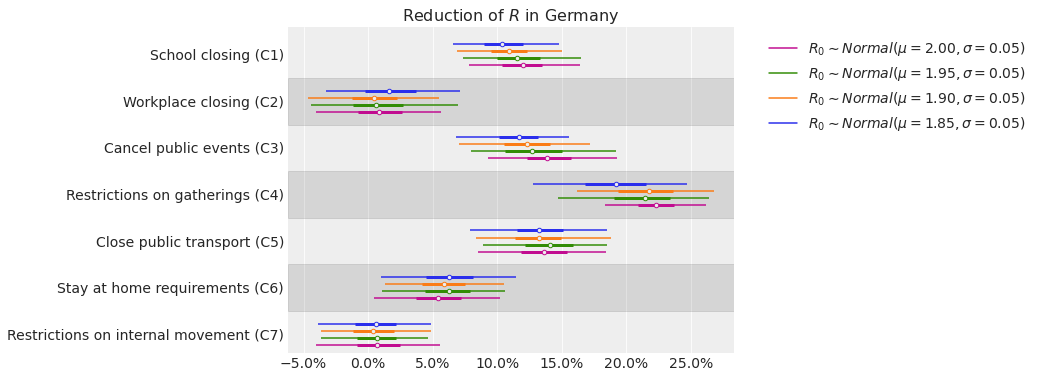

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,germany}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Germany")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))

[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


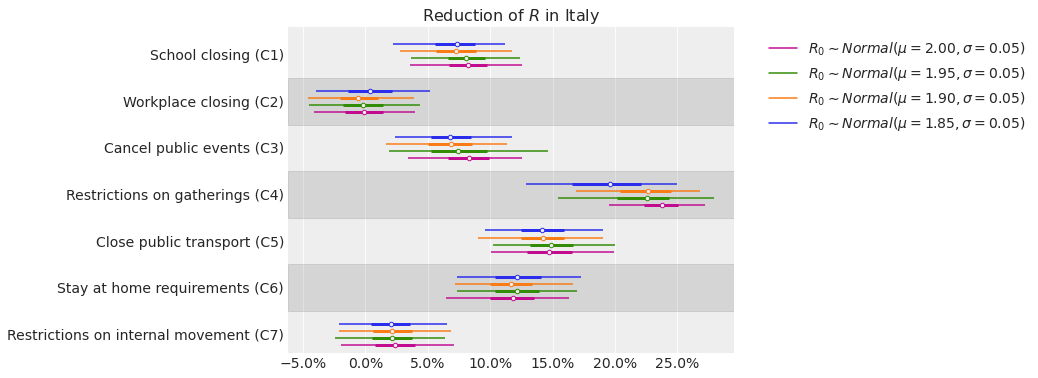

In [82]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,italy}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Italy")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))

[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


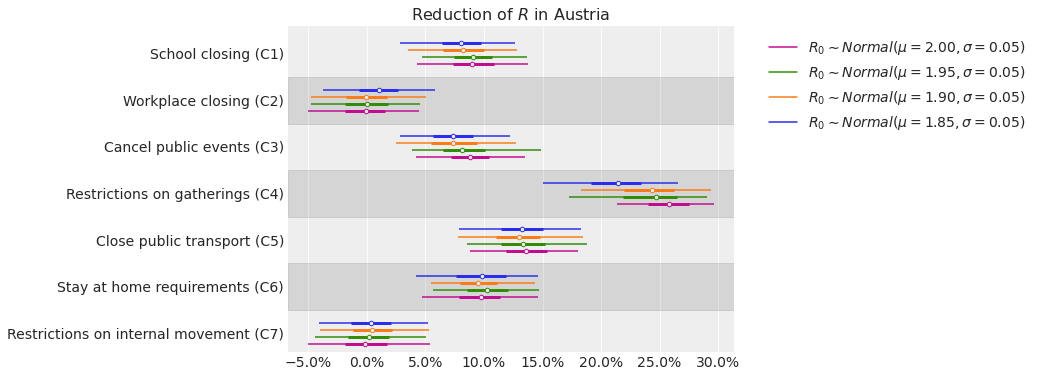

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,austria}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Austria")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))

[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


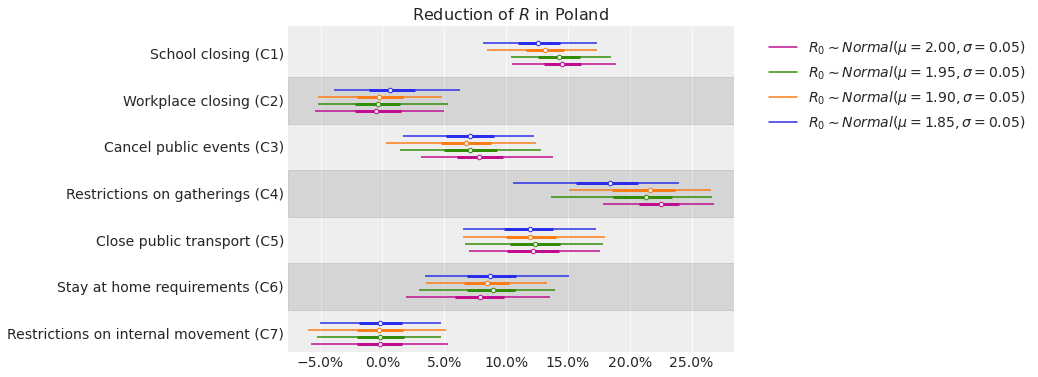

In [84]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,poland}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Poland")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))

[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


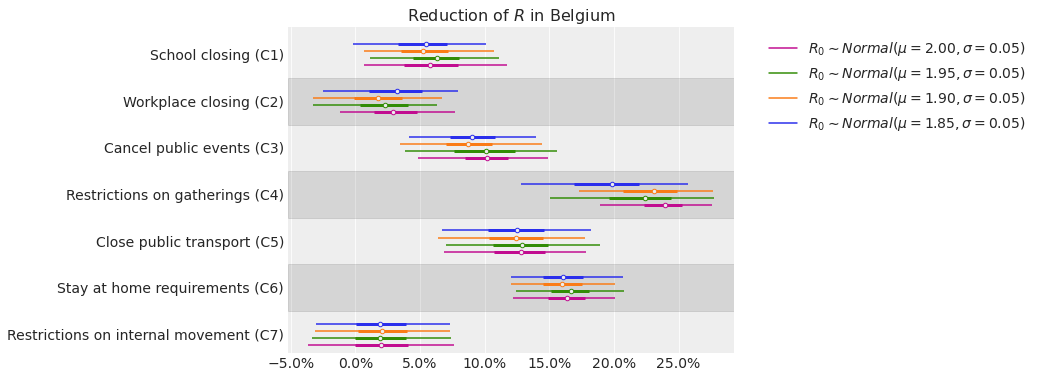

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,belgium}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Belgium")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))

[None]

E:\anaconda3\envs\covid19bayes\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


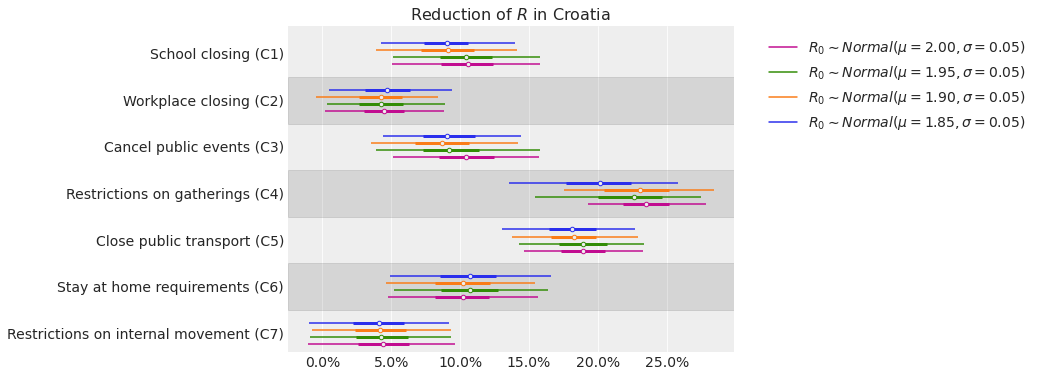

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
var_name = r"$\alpha_{policy,croatia}$"
ds1 = trace1.posterior
ds1["School closing (C1)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 0]
ds1["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 1]
ds1["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 2]
ds1["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 3]
ds1["Close public transport (C5)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 4]
ds1["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 5]
ds1["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds1[var_name][:, :, 6]

ds2 = trace2.posterior
ds2["School closing (C1)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 0]
ds2["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 1]
ds2["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 2]
ds2["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 3]
ds2["Close public transport (C5)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 4]
ds2["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 5]
ds2["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds2[var_name][:, :, 6]

ds3 = trace3.posterior
ds3["School closing (C1)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 0]
ds3["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 1]
ds3["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 2]
ds3["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 3]
ds3["Close public transport (C5)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 4]
ds3["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 5]
ds3["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds3[var_name][:, :, 6]

ds4 = trace4.posterior
ds4["School closing (C1)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 0]
ds4["Workplace closing (C2)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 1]
ds4["Cancel public events (C3)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 2]
ds4["Restrictions on gatherings (C4)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 3]
ds4["Close public transport (C5)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 4]
ds4["Stay at home requirements (C6)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 5]
ds4["Restrictions on internal movement (C7)"] = 1 - np.exp(1) ** -ds4[var_name][:, :, 6]

az.plot_forest((ds2, ds1, ds3, ds4), var_names=["School closing (C1)", \
                                      "Workplace closing (C2)", \
                                      "Cancel public events (C3)", \
                                      "Restrictions on gatherings (C4)", \
                                      "Close public transport (C5)", \
                                      "Stay at home requirements (C6)", \
                                      "Restrictions on internal movement (C7)"], \
               kind="forestplot", ax=ax, combined=True, \
               model_names=["$R_{0}\sim{Normal(\mu=1.85, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.90, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=1.95, \sigma=0.05)}$", \
                            "$R_{0}\sim{Normal(\mu=2.00, \sigma=0.05)}$"])
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.title(r"Reduction of $R$ in Croatia")

legend = ax.get_legend() 
legend.set(bbox_to_anchor=(1.05, 1.0))